In [50]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split

In [51]:
df_ = pd.read_csv('AirlineTweets.csv')


In [52]:
df_.head()


,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [53]:
df = df_[['airline_sentiment', 'text']].copy()


In [54]:
df.head()


,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials t...
2,neutral,@VirginAmerica I didn't today... Must mean I n...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...


<Axes: >

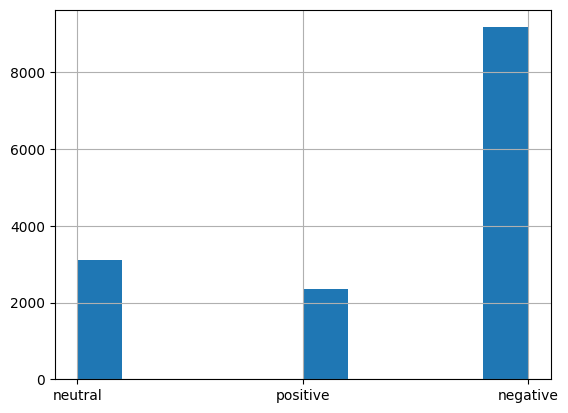

In [55]:
df['airline_sentiment'].hist()


In [56]:
target_map = {'positive': 1, 'negative': 0, 'neutral': 2}
df['target'] = df['airline_sentiment'].map(target_map)

In [57]:
df.head()


,airline_sentiment,text,target
0,neutral,@VirginAmerica What @dhepburn said.,2
1,positive,@VirginAmerica plus you've added commercials t...,1
2,neutral,@VirginAmerica I didn't today... Must mean I n...,2
3,negative,@VirginAmerica it's really aggressive to blast...,0
4,negative,@VirginAmerica and it's a really big bad thing...,0


In [58]:
df_train, df_test = train_test_split(df)


In [59]:
df_train.head()


,airline_sentiment,text,target
14634,negative,@AmericanAir right on cue with the delays👌,0
13318,positive,@AmericanAir thank you for NOT Cancelled Fligh...,1
7082,neutral,@JetBlue which type plane is flt 1065 from bos...,2
4424,neutral,@SouthwestAir live in Atlanta but cant enroll ...,2
9219,negative,"@USAirways yes, but we were answered and put b...",0


In [60]:
vectorizer = TfidfVectorizer(max_features=2000)


In [61]:
X_train = vectorizer.fit_transform(df_train['text'])


In [62]:
X_train


<10980x2000 sparse matrix of type '<class 'numpy.float64'>'
	with 157427 stored elements in Compressed Sparse Row format>

In [63]:
X_test = vectorizer.transform(df_test['text'])
    

In [64]:
Y_train = df_train['target']
Y_test = df_test['target']

In [65]:
model = LogisticRegression(max_iter=500)
model.fit(X_train, Y_train)
print("Train acc:", model.score(X_train, Y_train))
print("Test acc:", model.score(X_test, Y_test))

Train acc: 0.8531876138433515
Test acc: 0.8024590163934426


In [66]:
Pr_train = model.predict_proba(X_train)#[:, 1]
Pr_test = model.predict_proba(X_test)#[:, 1]
print("Train AUC:", roc_auc_score(Y_train, Pr_train, multi_class='ovo'))
print("Test AUC:", roc_auc_score(Y_test, Pr_test, multi_class='ovo'))

Train AUC: 0.9431962233104182
Test AUC: 0.8949275698744837


In [67]:
P_train = model.predict(X_train)
P_test = model.predict(X_test)

In [68]:
cm = confusion_matrix(Y_train, P_train, normalize='true')
cm

array([[0.96350683, 0.01003199, 0.02646118],
       [0.19751693, 0.70880361, 0.09367946],
       [0.31545064, 0.0472103 , 0.63733906]])

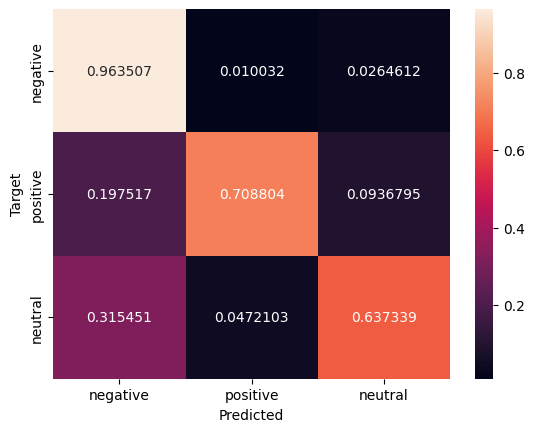

In [69]:
def plot_cm(cm):
  classes = ['negative', 'positive', 'neutral']
  df_cm = pd.DataFrame(cm, index=classes, columns=classes)
  ax = sn.heatmap(df_cm, annot=True, fmt='g')
  ax.set_xlabel("Predicted")
  ax.set_ylabel("Target")

plot_cm(cm)

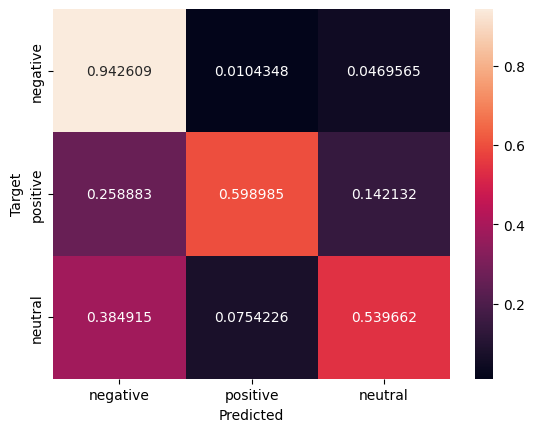

In [70]:
cm_test = confusion_matrix(Y_test, P_test, normalize='true')
plot_cm(cm_test)


In [71]:
binary_target_list = [target_map['positive'], target_map['negative']]
df_b_train = df_train[df_train['target'].isin(binary_target_list)]
df_b_test = df_test[df_test['target'].isin(binary_target_list)]

In [72]:
df_b_train.head()



,airline_sentiment,text,target
14634,negative,@AmericanAir right on cue with the delays👌,0
13318,positive,@AmericanAir thank you for NOT Cancelled Fligh...,1
9219,negative,"@USAirways yes, but we were answered and put b...",0
11581,negative,@usairways missed flight connection due to fli...,0
7406,negative,@JetBlue why are there so many delays to north...,0


In [73]:
X_train = vectorizer.fit_transform(df_b_train['text'])
X_test = vectorizer.transform(df_b_test['text'])

In [74]:
Y_train = df_b_train['target']
Y_test = df_b_test['target']

In [75]:
model = LogisticRegression(max_iter=500)
model.fit(X_train, Y_train)
print("Train acc:", model.score(X_train, Y_train))
print("Test acc:", model.score(X_test, Y_test))

Train acc: 0.9282080924855491
Test acc: 0.9117952265652024


In [76]:
Pr_train = model.predict_proba(X_train)[:, 1]
Pr_test = model.predict_proba(X_test)[:, 1]
print("Train AUC:", roc_auc_score(Y_train, Pr_train))
print("Test AUC:", roc_auc_score(Y_test, Pr_test))

Train AUC: 0.9783804169672402
Test AUC: 0.953109688810417


In [77]:
model.coef_


array([[-0.28174077,  0.56530484, -0.59127068, ...,  0.09250469,
         0.04582678, -0.42264493]])

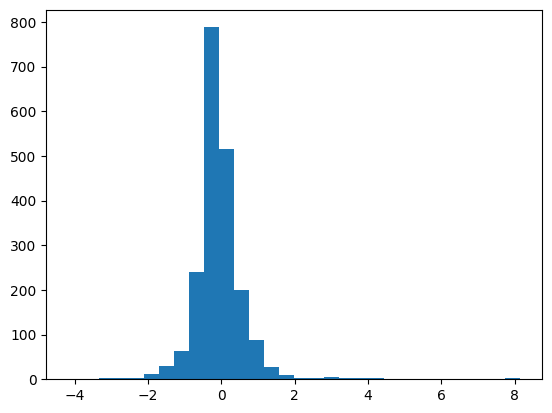

In [78]:
plt.hist(model.coef_[0], bins=30);


In [79]:
word_index_map = vectorizer.vocabulary_
word_index_map

{'americanair': 139,
 'right': 1483,
 'on': 1247,
 'with': 1952,
 'the': 1733,
 'delays': 498,
 'thank': 1729,
 'you': 1994,
 'for': 747,
 'not': 1215,
 'cancelled': 307,
 'flighting': 724,
 'all': 122,
 'flights': 731,
 'and': 144,
 'my': 1184,
 'life': 1030,
 'in': 923,
 'driving': 567,
 'this': 1745,
 'weather': 1915,
 'usairways': 1869,
 'yes': 1991,
 'but': 293,
 'we': 1914,
 'were': 1927,
 'answered': 154,
 'put': 1400,
 'back': 217,
 'hold': 875,
 'while': 1938,
 'they': 1739,
 'to': 1769,
 'check': 351,
 'our': 1269,
 'request': 1458,
 '50': 52,
 'mins': 1150,
 'late': 1004,
 'flightr': 730,
 'nothing': 1219,
 'missed': 1156,
 'flight': 719,
 'connection': 421,
 'due': 573,
 'attendant': 197,
 'delay': 495,
 'yet': 1993,
 'no': 1207,
 'voucher': 1892,
 'your': 1995,
 'part': 1289,
 'fail': 661,
 'jetblue': 966,
 'why': 1943,
 'are': 173,
 'there': 1737,
 'so': 1609,
 'many': 1100,
 'east': 585,
 'cities': 362,
 'just': 973,
 'sad': 1503,
 'that': 1732,
 'even': 622,
 'after': 1

In [80]:
threshold = 2

print("Most positive words:")
for word, index in word_index_map.items():
    weight = model.coef_[0][index]
    if weight > threshold:
        print(word, weight)

Most positive words:
thank 7.787161077899465
jetblue 3.5658003779504646
awesome 4.396640258084816
virginamerica 3.3555463781334907
made 2.1023534689153025
thanks 8.135296718012304
southwestair 3.078062123597955
best 3.828838948948923
great 5.134110608827689
excellent 2.225189268442009
love 4.195675009012161
thx 2.806749810542111
kudos 2.479357659788146
good 2.6564645509044578
appreciate 2.822052865517605
amazing 3.6781238640278526
worries 2.884258394837283
wonderful 2.0538210426569905


In [81]:
print("Most negative words:")
for word, index in word_index_map.items():
    weight = model.coef_[0][index]
    if weight < -threshold:
        print(word, weight) 

Most negative words:
not -4.1634347107564915
cancelled -2.8722151740679513
hold -2.6387086363294463
nothing -2.105852369616659
no -3.7047920581150375
why -2.118092325112824
hours -2.9931527255415324
hour -2.017591232615666
what -2.5222825051647613
delayed -2.6812906026864995
website -2.027295651346996
worst -2.9672166010464163
luggage -2.3362404190183232
